In [94]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install openpyxl
!pip install tabulate
!pip install scikit-learn

     ---------------------------------------- 0.0/60.8 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.8 kB ? eta -:--:--
     ------------------------- ------------ 41.0/60.8 kB 487.6 kB/s eta 0:00:01
     -------------------------------------- 60.8/60.8 kB 648.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.1/8.7 MB 5.1 MB/s eta 0:00:02
   - -------------------------------------- 0.4/8.7 MB 4.9 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/8.7 MB 4.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/8.7 MB 4.1 MB/s eta 0:00:02
   --- ------------------------------------ 0.8/8.7 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.0/8.7 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.1/8.7 MB 3.6 MB/s eta 0:00:03
   ----- ---------------------------------- 1.2/8.7 MB 3.5 MB/s eta 0:00:03
   ------ --------

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
df = pd.read_excel('data/data_customer_reserve_price.xlsx')

consumers = list(df.columns)[1:]
vals = {c: df[c].to_numpy() for c in consumers}

### пункт а
Так как мы производим дискретные товары, то $Q(p)$ имеет ступенчатый вид, то есть меняется только когда $p$ пересекает одну из reserve prices. Поэтому можно перебрать все $p$ и найти совокупный спрос, а оттуда уже прибыль как $\pi(p) = (p - MC) \cdot Q(p)$


In [123]:
all_vals = np.concatenate(list(vals.values()))
prices = np.unique(all_vals[all_vals > 0])
prices = np.sort(prices)

MC = 4.0
rows = []
for price in prices:
    Q = sum(int((v >= price).sum()) for v in vals.values())
    profit = (price - MC) * Q
    rows.append({'price': int(price), 'Q': int(Q), 'profit': int(profit)})
res = pd.DataFrame(rows).sort_values('price')
opt = res.loc[res['profit'].idxmax()]
opt

price      12
Q         101
profit    808
Name: 11, dtype: int64

Из нашего перебора видно, что $p^* = 12$ является оптимальной ценой, $Q(p^*) = 101$, а отсюда $\pi(p^*) = 808 = (p^* - MC) \cdot Q(p^*)$

Ниже я изобразил график спроса и график прибыли

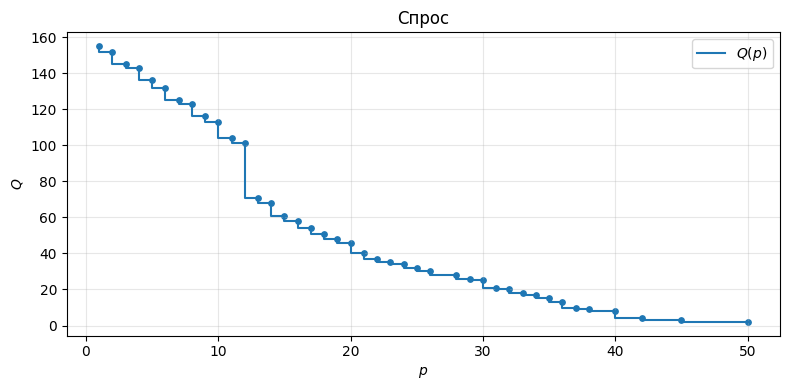

In [124]:
prices = [r['price'] for r in rows]
Q = [r['Q'] for r in rows]
profits = [r['profit'] for r in rows]

plt.figure(figsize=(8,4))
plt.step(prices, Q, label=r'$Q(p)$')
plt.scatter(prices, Q, s = 15)
plt.xlabel(r'$p$'); plt.ylabel(r'$Q$')
plt.title('Спрос'); plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout()
plt.show()

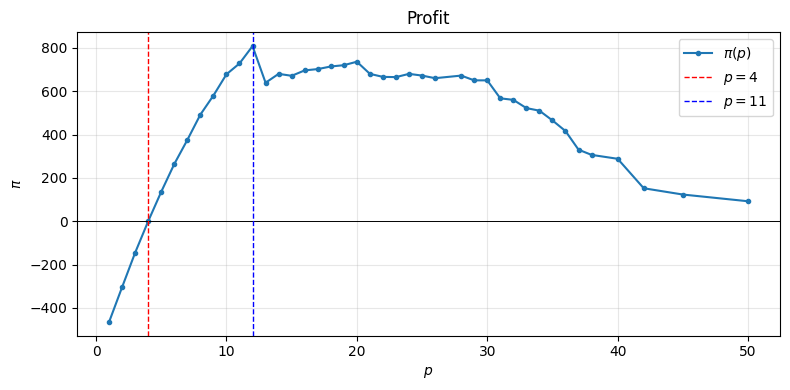

In [125]:
plt.figure(figsize=(8,4))
plt.plot(prices, profits, '-o', ms=3, label=r'$\pi(p)$')
plt.axhline(0, color='k', lw=0.7)
plt.axvline(x=4, color='red', linestyle='--', linewidth=1, label=r'$p=4$')
plt.axvline(x=12, color='blue', linestyle='--', linewidth=1, label=r'$p=11$')
plt.xlabel(r'$p$'); plt.ylabel(r'$\pi$')
plt.title('Profit'); plt.grid(True, alpha=0.3); plt.legend()
plt.tight_layout(); plt.show()

### пункт б
Каждого потребителя мы воспринимаем, как отдельный сегмент и для него находим цену, которая максимизирует прибыль именно от этого сегмента $:)$

In [126]:
best = []
for name, v in vals.items():
    cand = np.unique(v[v > 0])
    cons_best = None
    
    for price in cand:
        Q = int((v >= price).sum())
        profit = (price - MC) * Q
        
        if cons_best is None or profit > cons_best['profit']:
            cons_best = {'segment': name, 'price': int(price), 'Q': int(Q), 'profit': int(profit)}
    best.append(cons_best)
res = pd.DataFrame(best).sort_values('profit')
print(res.to_markdown(index=False))

| segment   |   price |   Q |   profit |
|:----------|--------:|----:|---------:|
| Karina    |       8 |   4 |       16 |
| Daria     |      12 |   5 |       40 |
| Boris     |      10 |  10 |       60 |
| Irina     |      37 |   2 |       66 |
| Anna      |      13 |   9 |       81 |
| Geoge     |      30 |   5 |      130 |
| Egor      |      17 |  13 |      169 |
| Caterine  |      12 |  23 |      184 |
| Fedor     |      29 |   8 |      200 |
| Helen     |      24 |  10 |      200 |


Отсюда мы можем видеть, какая цена является оптимальной для каждого потребителя!

In [127]:
total_q = int(res['Q'].sum())
total_profit = int(res['profit'].sum())

print(f"Весь Q = {total_q}, вся прибыль = {total_profit}")

Весь Q = 89, вся прибыль = 1146


### пункт c
Из лекции мы знаем, что при совершенной дискриминации - это когда мы знаем, индив готовности платить за каждую доп единицу. в общем, $v_i'(x_i) = MC$

In [128]:
rows = []
for name, v in vals.items():
    q = int((v >= MC).sum())
    profit = float(v[v >= MC].sum()) - MC * q
    rows.append({'segment': name, 'q': q, 'profit': profit})
res = pd.DataFrame(rows).sort_values('profit')
print(res.to_markdown(index=False))

| segment   |   q |   profit |
|:----------|----:|---------:|
| Karina    |   8 |       28 |
| Irina     |   2 |       79 |
| Daria     |   9 |       94 |
| Boris     |  19 |      106 |
| Anna      |  18 |      153 |
| Caterine  |  23 |      184 |
| Geoge     |  10 |      235 |
| Fedor     |  14 |      294 |
| Egor      |  20 |      335 |
| Helen     |  20 |      380 |


Отсюда видим, сколько товара продаем каждому потребителю и какую прибыль имеем.

In [129]:
total_q = int(res['q'].sum())
total_profit = int(res['profit'].sum())
print(f"Весь Q = {total_q}, вся прибыль = {total_profit}")

Весь Q = 143, вся прибыль = 1888


Ответ: ответы даны выше.